# **Gausian Mixture Model and KMeans Clustering Performance on different Datasets**

## On **Iris Dataset**

In [17]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [18]:
iris_data = load_iris()

In [19]:
class_names_iris = iris_data.feature_names

To Scale the feature for better performance of GMM and KMeans

In [20]:
X = iris_data.data
z = StandardScaler()
X = z.fit_transform(X)

Trying to tune the best hyperparameter by find suitable n_components and covariance_type

Silhouette Score for n_components  2  and covariance type  full  :-  0.5817500491982808


Silhouette Score for n_components  2  and covariance type  tied  :-  0.5817500491982808


Silhouette Score for n_components  2  and covariance type  tied  :-  0.5817500491982808


Silhouette Score for n_components  2  and covariance type  spherical  :-  0.5770346019475988


Silhouette Score for n_components  3  and covariance type  full  :-  0.37416491866541235


Silhouette Score for n_components  3  and covariance type  tied  :-  0.385441386244788


Silhouette Score for n_components  3  and covariance type  tied  :-  0.385441386244788


Silhouette Score for n_components  3  and covariance type  spherical  :-  0.45994823920518635


Silhouette Score for n_components  4  and covariance type  full  :-  0.3071072363337698


Silhouette Score for n_components  4  and covariance type  tied  :-  0.318097670253693


Silhouette Score for n_components  4  and covariance type  tied  :-  0.30754848403490825




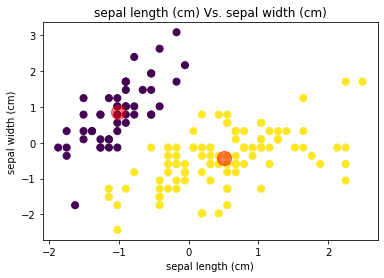

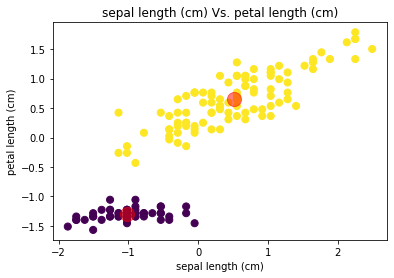

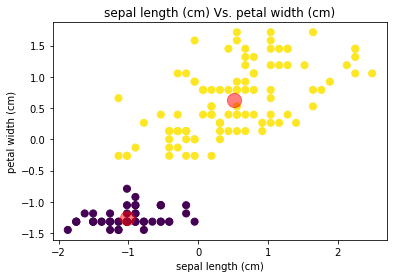

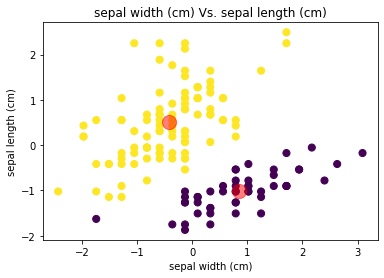

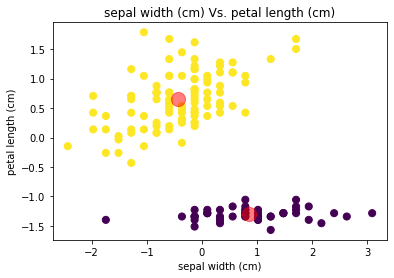

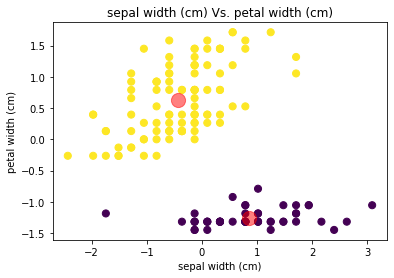

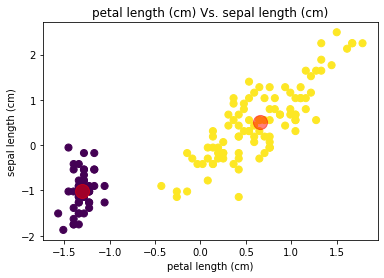

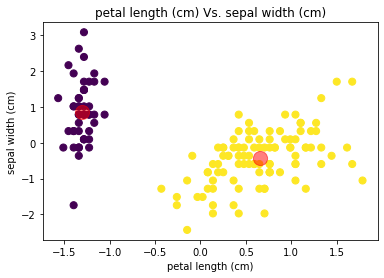

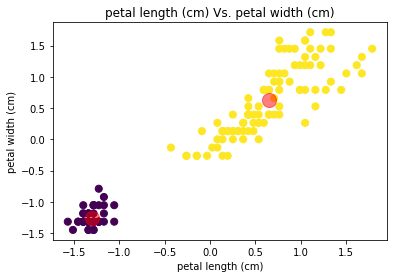

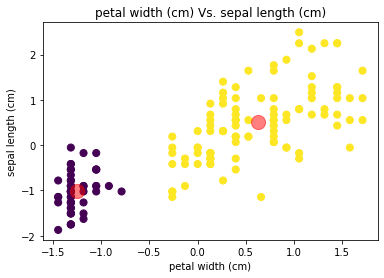

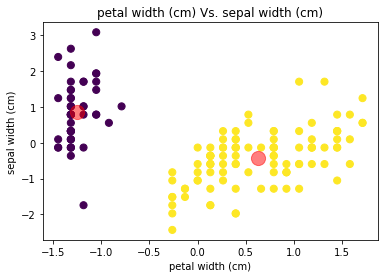

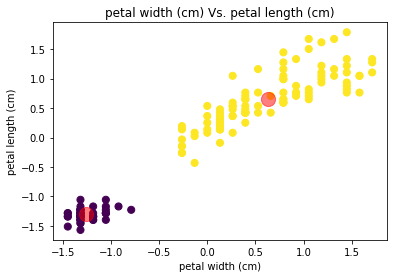

In [21]:
covar_type = ['full' ,'tied','tied','spherical']
components_list = [2,3,4,5,6,7]
model_candidate = []
for component in components_list:
  for type in covar_type:
    EM = GaussianMixture(n_components=component,covariance_type=type)
    EM.fit(X)
    cluster = EM.predict(X)
    silhouette = silhouette_score(X,cluster)
    centres = EM.means_
    print("Silhouette Score for n_components ",component," and covariance type ",type," :- ",silhouette)
    print("\n")
    candidate = {
        "n_components":component,
        "covariance_type":type,
        "Silhouette Score":silhouette,
        "cluster":cluster,
        "centres":centres
    }
    model_candidate.append(candidate)
    
best_gmm_iris = max(
                model_candidate, key=lambda x: x["Silhouette Score"]
            )

print("Max. Silhouette Score is ",best_gmm_iris["Silhouette Score"]," and no. of Cluster is ",best_gmm_iris["n_components"]," with Covarience matrix type ",best_gmm_iris["covariance_type"])    

for i in range(4):
    for j in range(4):
      if i != j:
        plt.scatter(X[:, i], X[:, j], c=best_gmm_iris["cluster"],s=50, cmap='viridis')
        plt.scatter(best_gmm_iris["centres"][:, i], best_gmm_iris["centres"][:, j], c='red', s=200, alpha=0.5,marker='o')
        plt.xlabel(class_names_iris[i])
        plt.ylabel(class_names_iris[j])
        t = class_names_iris[i] + " Vs. "+class_names_iris[j]
        plt.title(t)
        plt.show()   
    


## Perfromance of KMeans on Same dataset

Silhouette Score for n_cluster  2 :-  0.5817500491982808
Silhouette Score for n_cluster  3 :-  0.45994823920518635
Silhouette Score for n_cluster  4 :-  0.3882200962165986
Silhouette Score for n_cluster  5 :-  0.3493912865840493
Silhouette Score for n_cluster  6 :-  0.3265618959264091
Silhouette Score for n_cluster  7 :-  0.339178238257096
Max. Silhouette Score is  0.5817500491982808  and no. of Cluster is  2


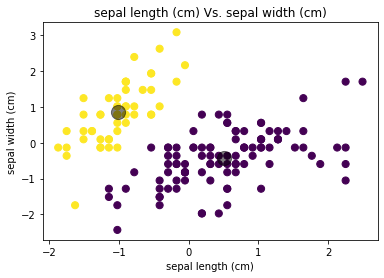

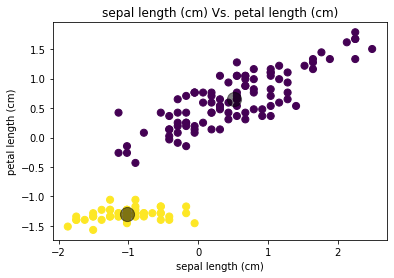

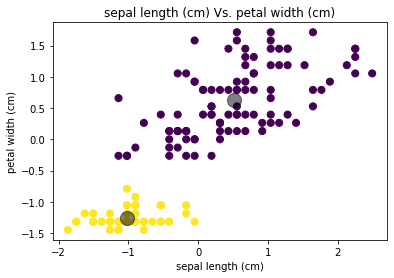

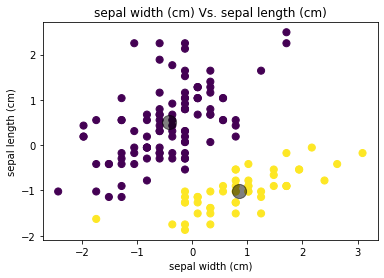

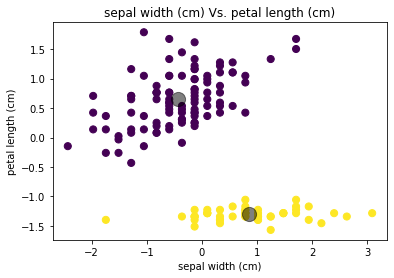

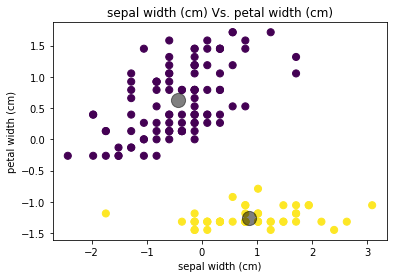

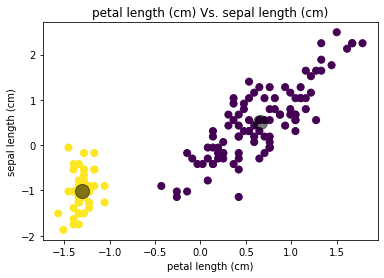

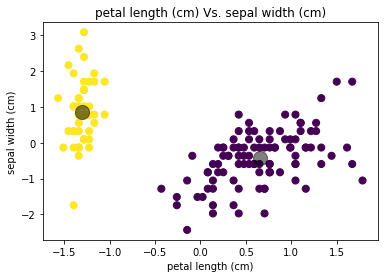

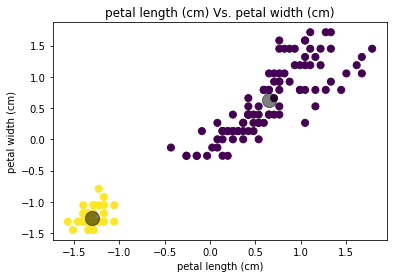

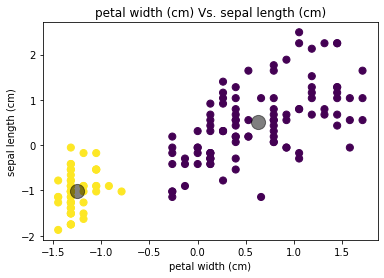

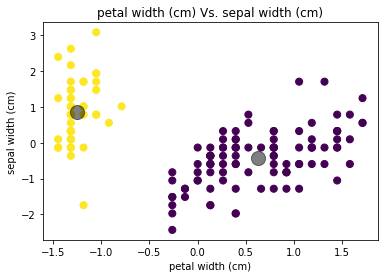

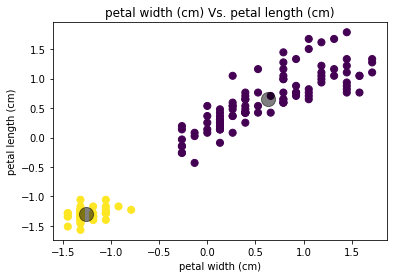

In [22]:
model_candidate_iris = []
for cluster in components_list:
  kmeans = KMeans(n_clusters=cluster)
  kmeans.fit(X)
  cluster_kmeans = kmeans.predict(X)
  centres = kmeans.cluster_centers_
  score = silhouette_score(X,cluster_kmeans)
  print("Silhouette Score for n_cluster ",cluster,":- ",score)
  candidate = {
        "centers":centres,
        "n_cluster":cluster,
        "Silhouette Score":score,
        "cluster_dia":cluster_kmeans
    }
  model_candidate_iris.append(candidate)

best_model_iris = max(
                model_candidate_iris, key=lambda x: x["Silhouette Score"]
            )
print("Max. Silhouette Score is ",best_model_iris["Silhouette Score"]," and no. of Cluster is ",best_model_iris["n_cluster"])

for i in range(4):
    for j in range(4):
      if i != j:
        plt.scatter(X[:, i], X[:, j], c=best_model_iris["cluster_dia"],s=50, cmap='viridis')
        plt.scatter(best_model_iris["centers"][:, i], best_model_iris["centers"][:, j], c='black', s=200, alpha=0.5)
        plt.xlabel(class_names_iris[i])
        plt.ylabel(class_names_iris[j])
        t = class_names_iris[i] + " Vs. "+class_names_iris[j]
        plt.title(t)
        plt.show()

## On **Diabetes dataset**

In [23]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df = df.drop('Outcome',axis=1)
X = df.values

In [24]:
col_names = df.columns
print(col_names)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [25]:
Scale = StandardScaler()
X = Scale.fit_transform(X)

In [26]:
X.shape

(768, 8)

### Using KMeans clustering on Diabetes Dataset

In [27]:
cluster_list_dia = [2,3,4,5,6,7,8,9]
model_candidate_dia = []
for no_cluster in cluster_list_dia:
  km_dia = KMeans(n_clusters=no_cluster)
  cluster_dia = km_dia.fit_predict(X)
  score = silhouette_score(X,cluster_dia)
  centres = km_dia.cluster_centers_
  print("Silhouette Score for ",no_cluster," cluster is :- ",score)
  candidate = {
        "centers":centres,
        "n_cluster":no_cluster,
        "Silhouette Score":score,
        "cluster_dia":cluster_dia
    }
  model_candidate_dia.append(candidate)
  
best_model = max(
                model_candidate_dia, key=lambda x: x["Silhouette Score"]
            )


Silhouette Score for  2  cluster is :-  0.1945067245390151
Silhouette Score for  3  cluster is :-  0.17954310409084448
Silhouette Score for  4  cluster is :-  0.20174890536020604
Silhouette Score for  5  cluster is :-  0.1659852355231016
Silhouette Score for  6  cluster is :-  0.16854460776783728
Silhouette Score for  7  cluster is :-  0.168438383120488
Silhouette Score for  8  cluster is :-  0.167871358401255
Silhouette Score for  9  cluster is :-  0.17108857577806189


Max. Silhouette Score is 0.20174890536020604 and no. of Cluster is 4


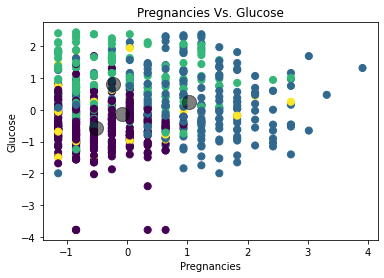

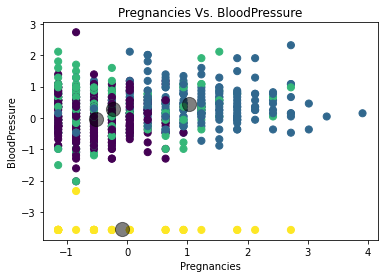

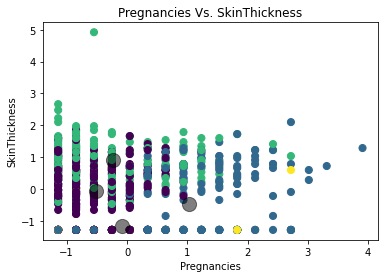

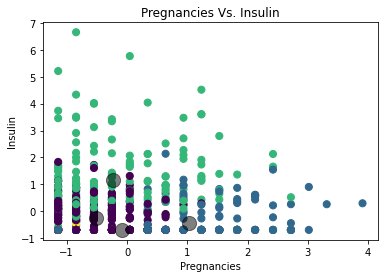

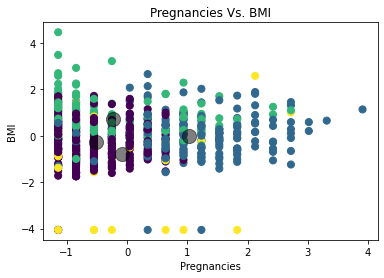

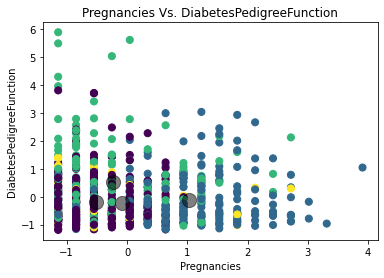

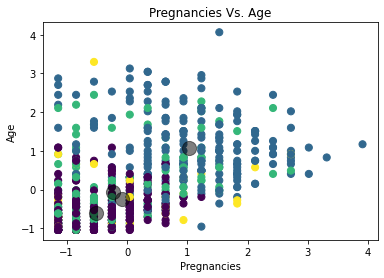

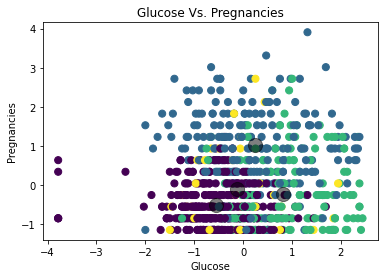

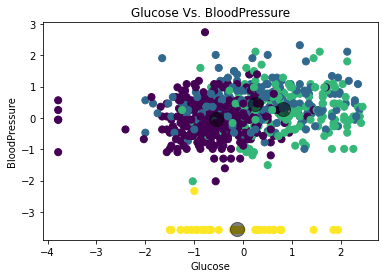

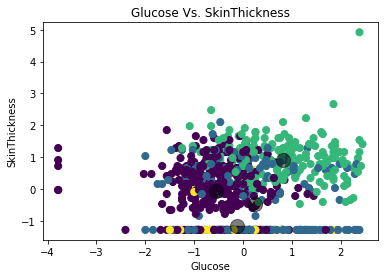

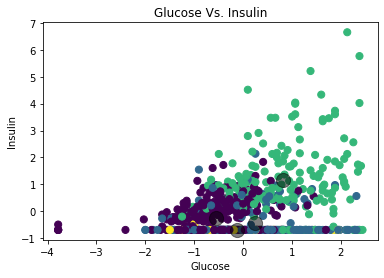

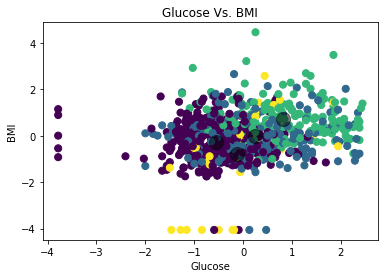

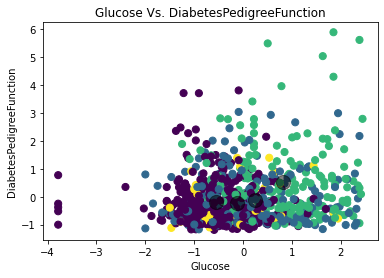

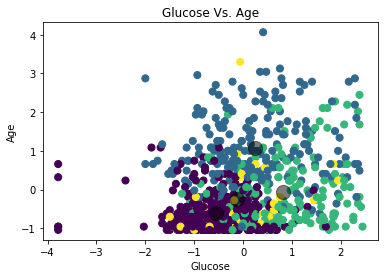

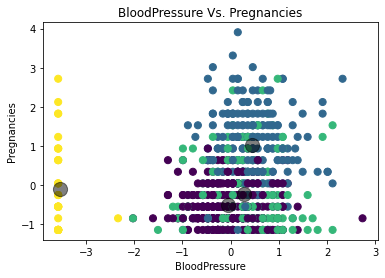

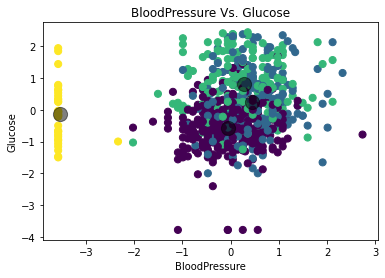

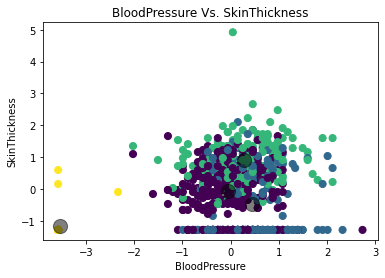

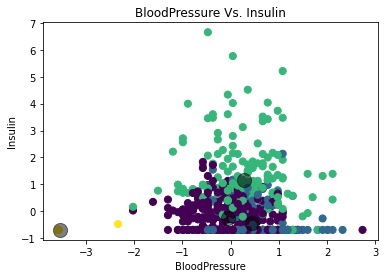

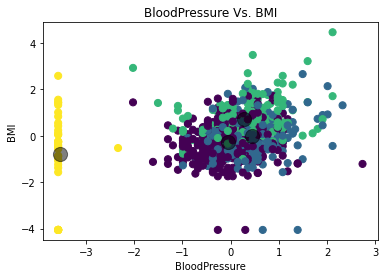

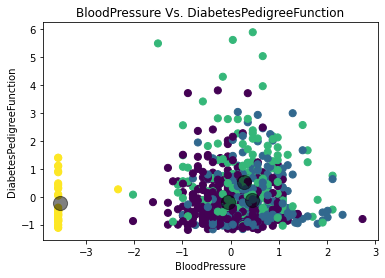

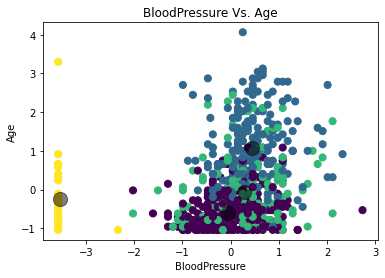

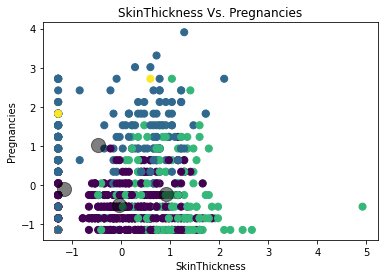

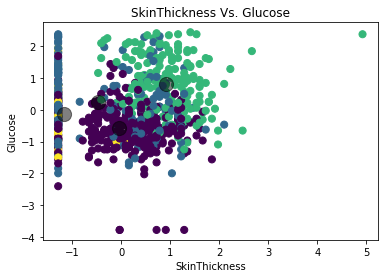

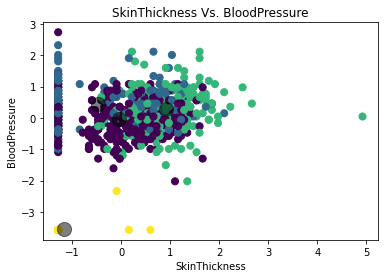

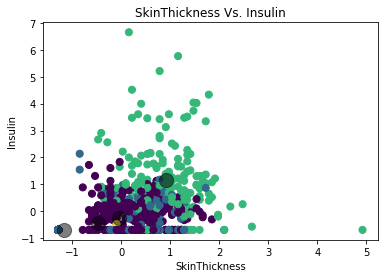

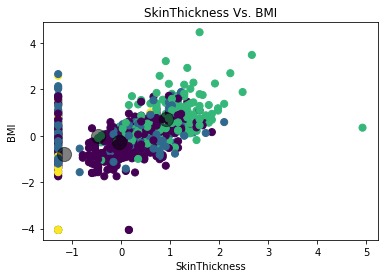

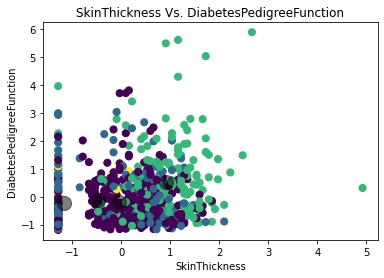

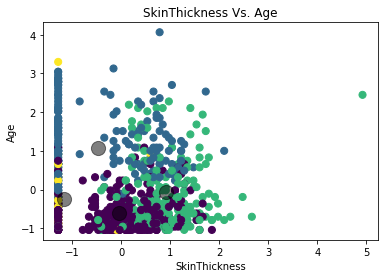

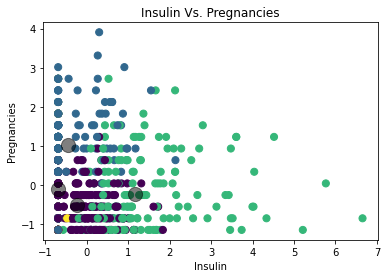

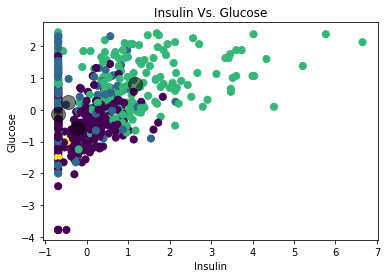

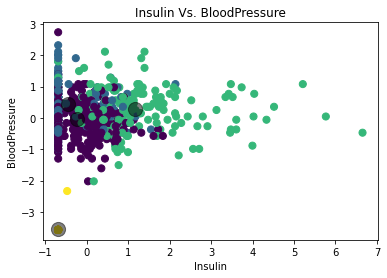

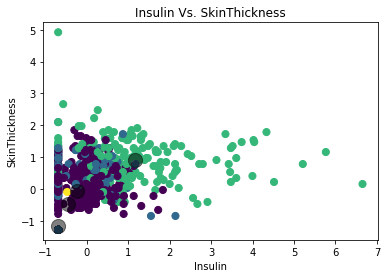

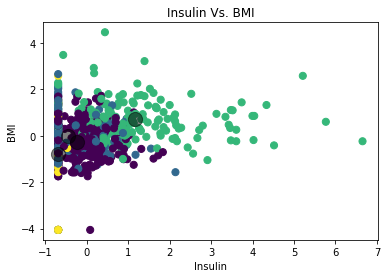

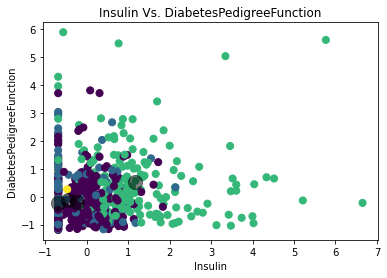

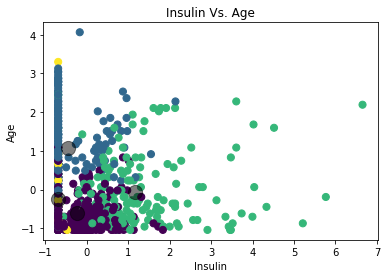

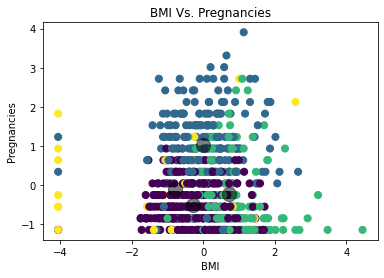

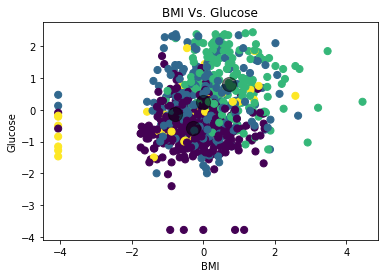

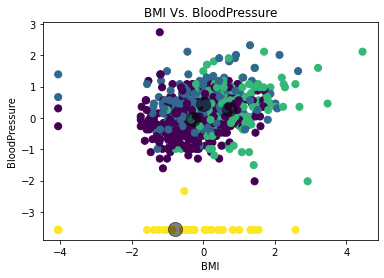

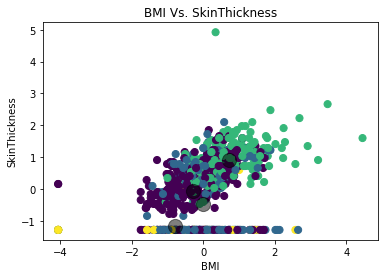

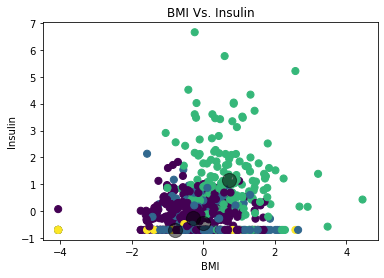

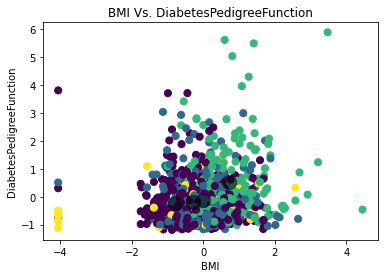

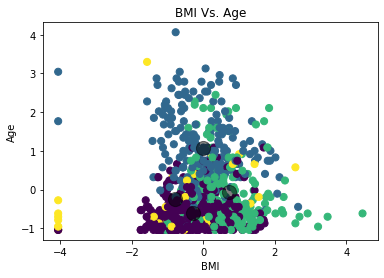

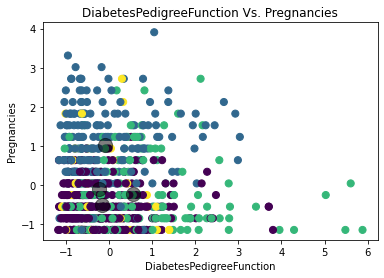

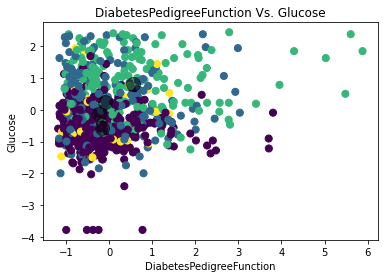

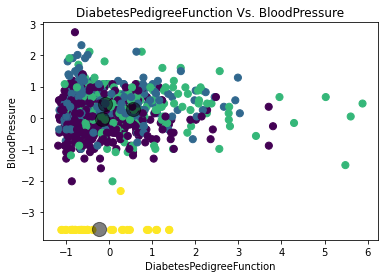

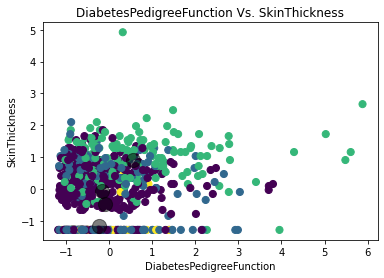

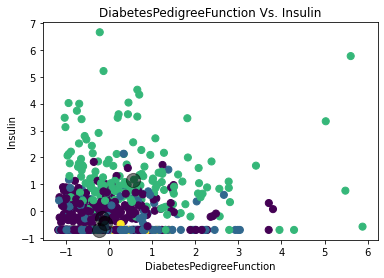

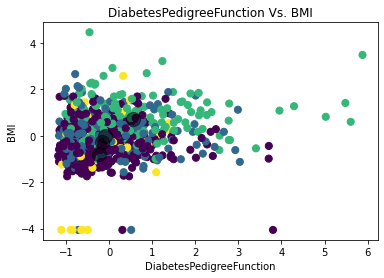

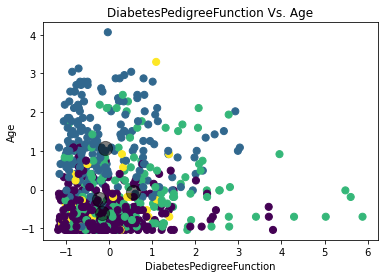

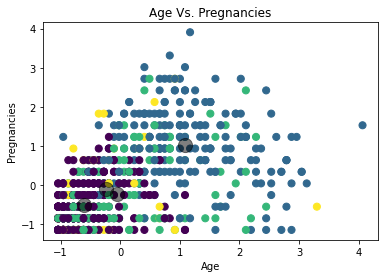

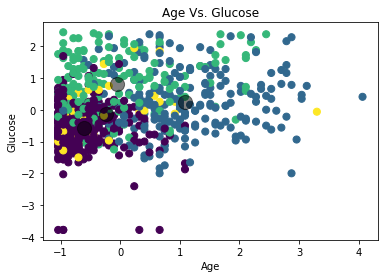

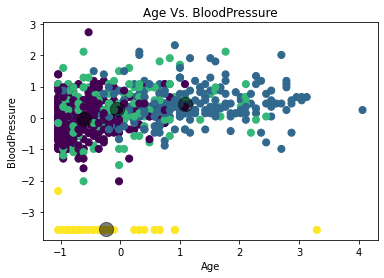

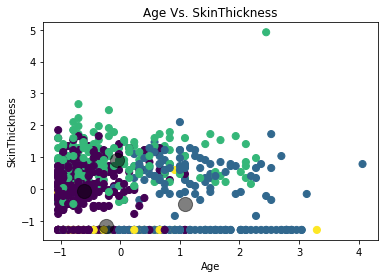

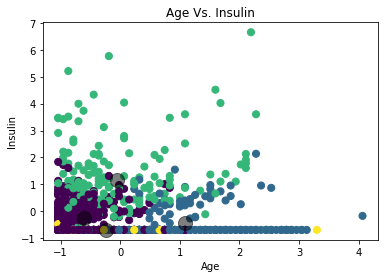

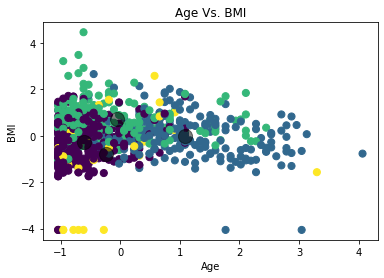

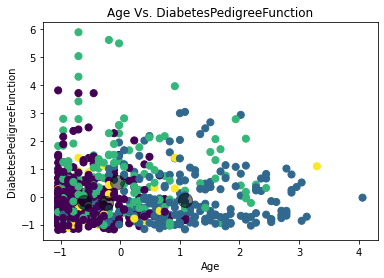

In [28]:
print("Max. Silhouette Score is "+ str(best_model["Silhouette Score"])+" and no. of Cluster is "+str(best_model["n_cluster"]))
for i in range(8):
    for j in range(8):
      if i != j:
        plt.scatter(X[:, i], X[:, j], c=best_model["cluster_dia"],s=50, cmap='viridis')
        plt.scatter(best_model["centers"][:, i], best_model["centers"][:, j], c='black', s=200, alpha=0.5)
        plt.xlabel(col_names[i])
        plt.ylabel(col_names[j])
        t = col_names[i] + " Vs. "+col_names[j]
        plt.title(t)
        plt.show()

Silhouette Score for n_components  2  and covariance type  full  :-  0.1533008706191253


Silhouette Score for n_components  2  and covariance type  tied  :-  0.20231402594130107


Silhouette Score for n_components  2  and covariance type  tied  :-  0.20298710001597922


Silhouette Score for n_components  2  and covariance type  spherical  :-  0.12450986328131265


Silhouette Score for n_components  3  and covariance type  full  :-  0.07849084246693477


Silhouette Score for n_components  3  and covariance type  tied  :-  0.20154297462375179


Silhouette Score for n_components  3  and covariance type  tied  :-  0.20154297462375179


Silhouette Score for n_components  3  and covariance type  spherical  :-  0.148185398716661


Silhouette Score for n_components  4  and covariance type  full  :-  0.08813037799547434


Silhouette Score for n_components  4  and covariance type  tied  :-  0.22133106718124637


Silhouette Score for n_components  4  and covariance type  tied  :-  0.146860128624

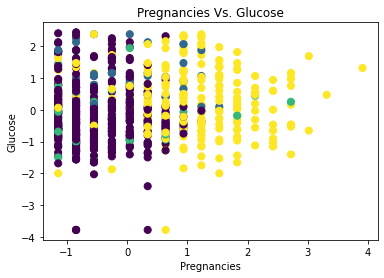

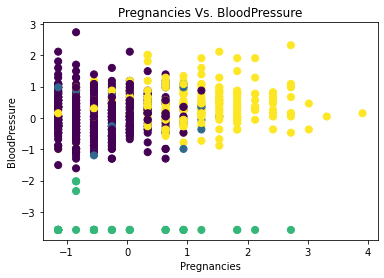

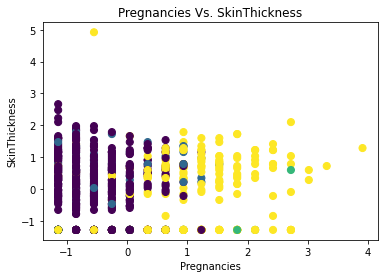

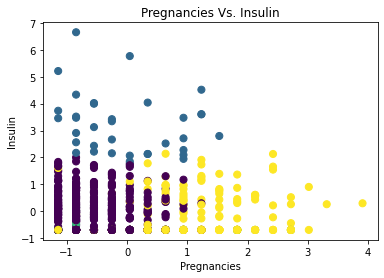

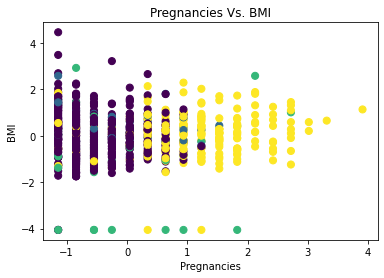

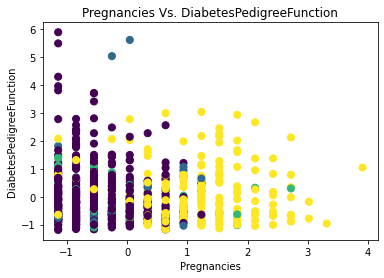

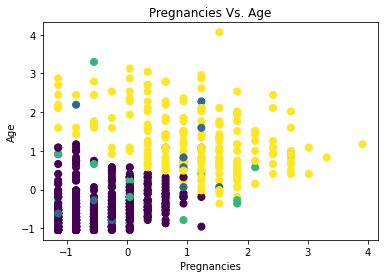

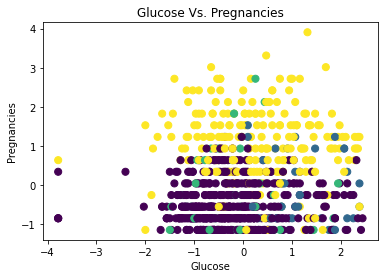

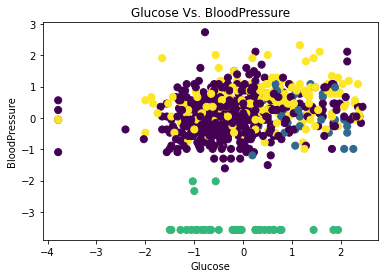

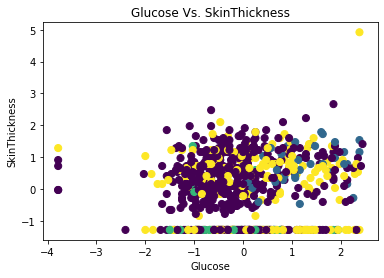

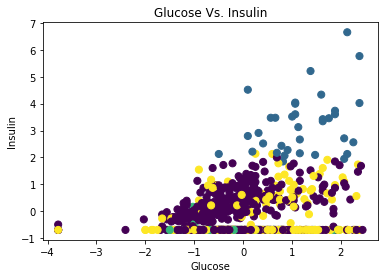

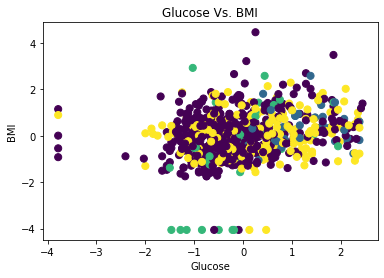

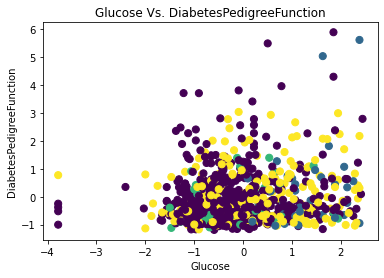

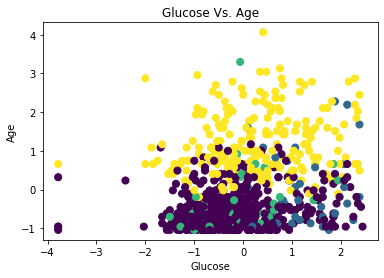

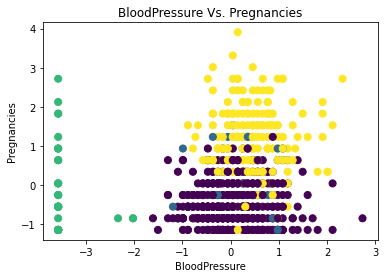

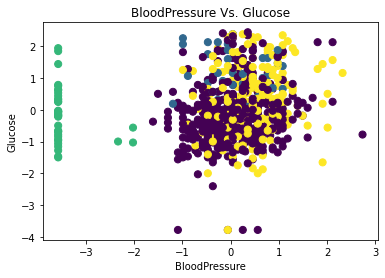

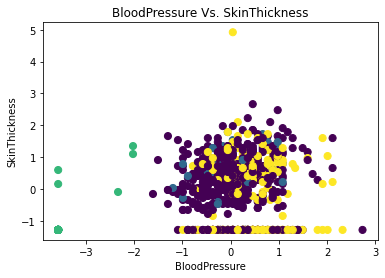

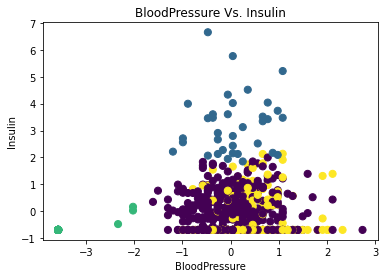

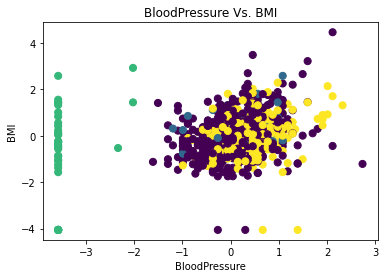

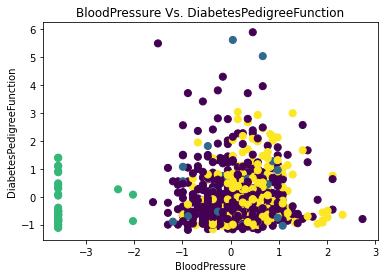

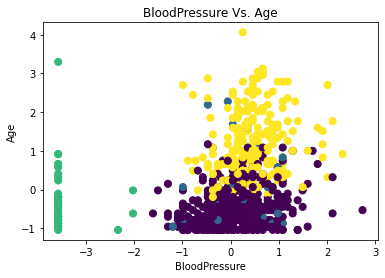

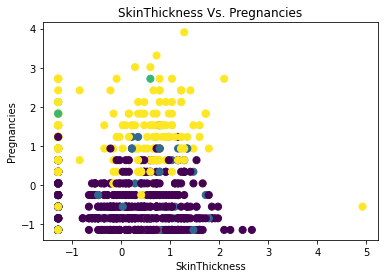

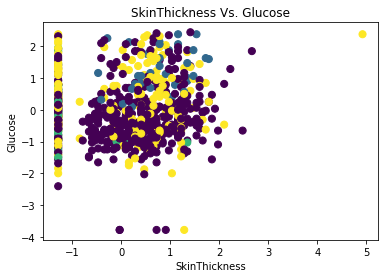

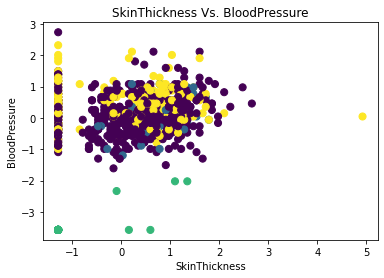

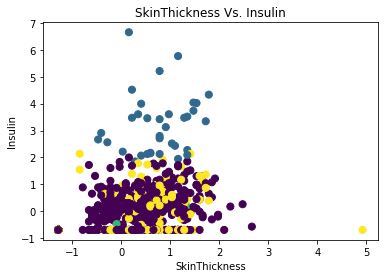

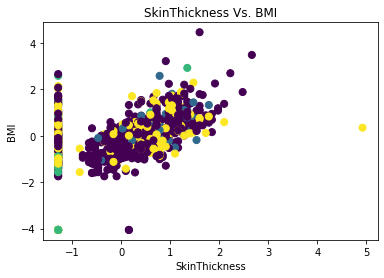

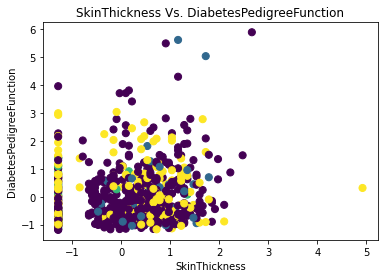

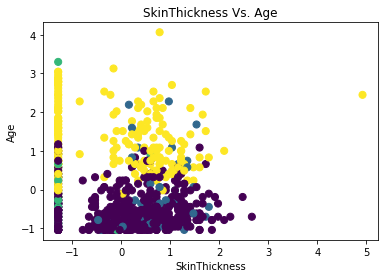

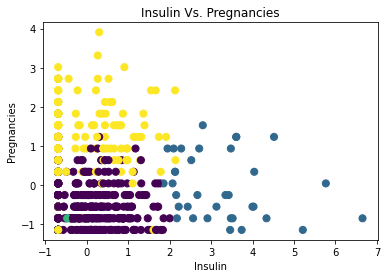

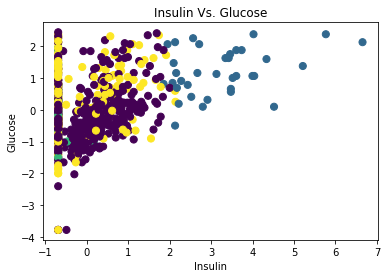

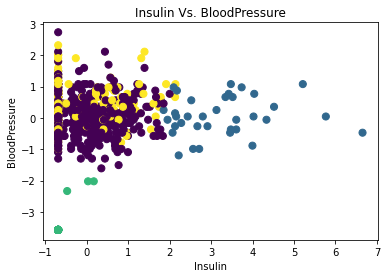

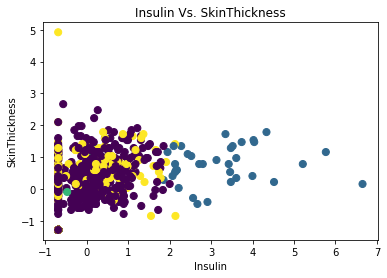

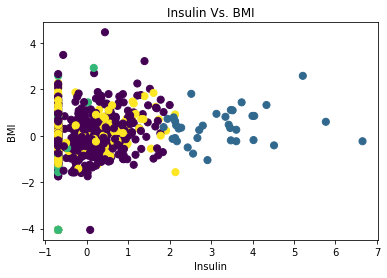

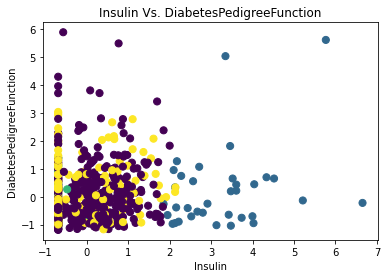

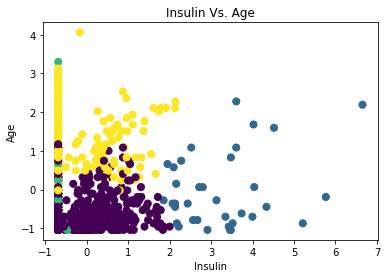

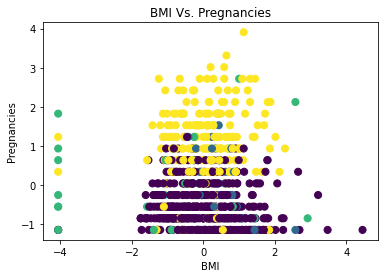

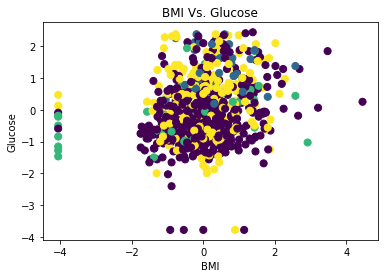

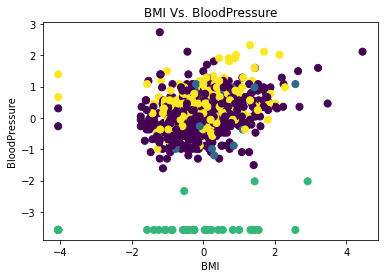

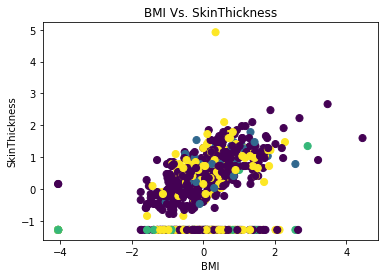

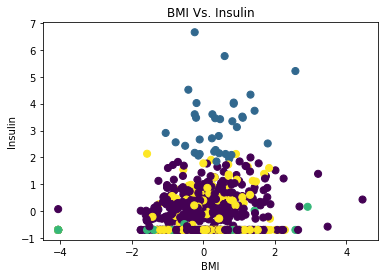

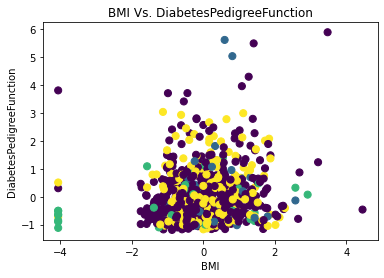

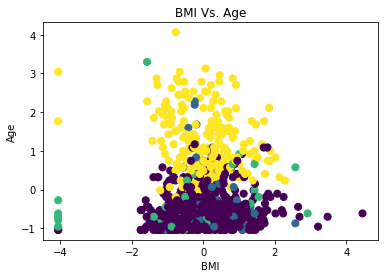

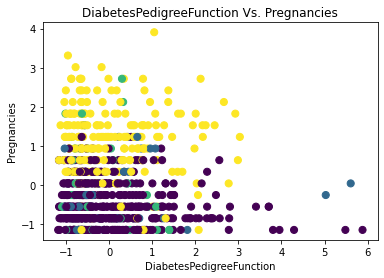

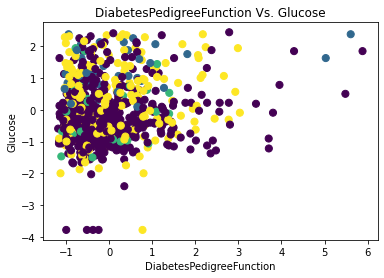

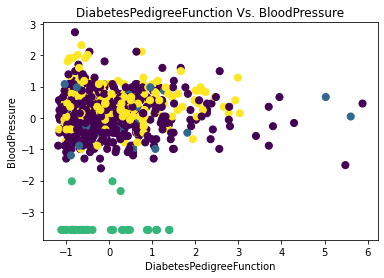

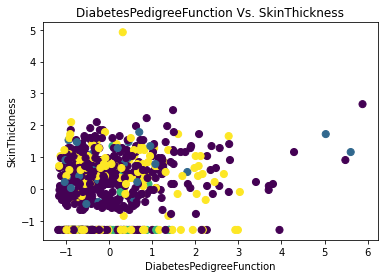

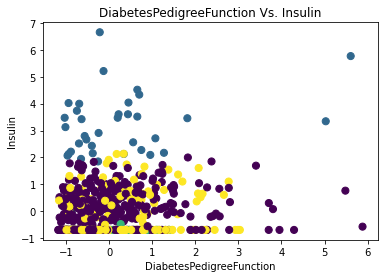

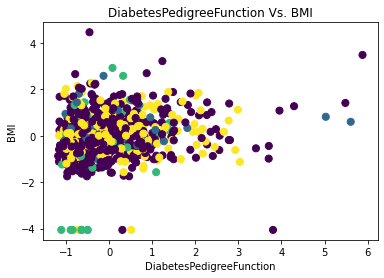

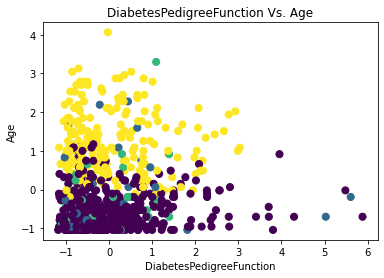

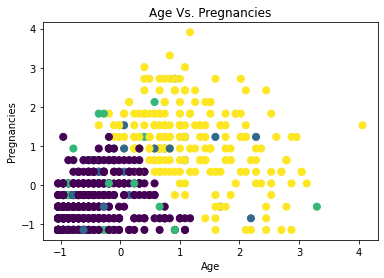

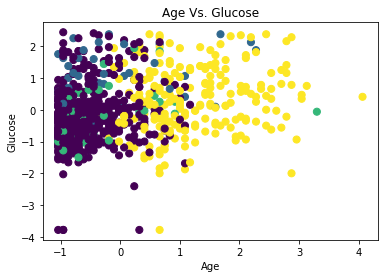

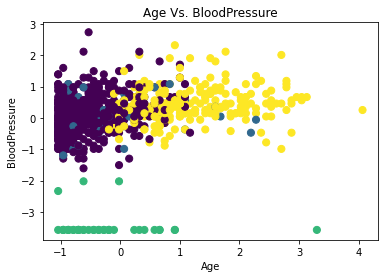

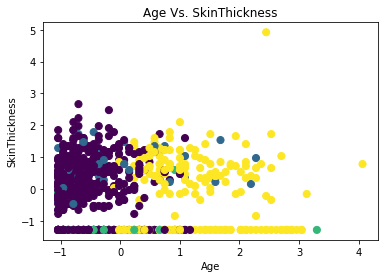

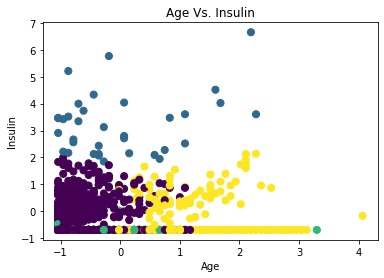

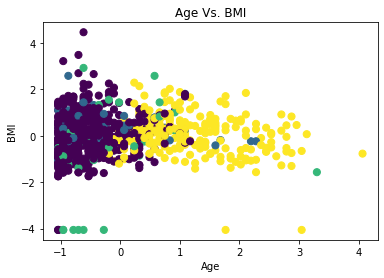

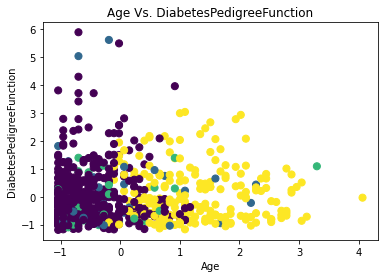

In [29]:
covar_type = ['full' ,'tied','tied','spherical']
components_list = [2,3,4,5,6,7]
model_candidate_dia = []
for component in components_list:
  for type in covar_type:
    EM = GaussianMixture(n_components=component,covariance_type=type)
    EM.fit(X)
    cluster = EM.predict(X)
    silhouette = silhouette_score(X,cluster)
    print("Silhouette Score for n_components ",component," and covariance type ",type," :- ",silhouette)
    print("\n")
    candidate = {
        "n_components":component,
        "covariance_type":type,
        "Silhouette Score":silhouette,
        "cluster":cluster
    }
    model_candidate_dia.append(candidate)
    
best_gmm_dia = max(
                model_candidate_dia, key=lambda x: x["Silhouette Score"]
            )

print("Max. Silhouette Score is ",best_gmm_dia["Silhouette Score"]," and no. of Cluster is ",best_gmm_dia["n_components"]," with Covarience matrix type ",best_gmm_dia["covariance_type"])    

for i in range(8):
    for j in range(8):
      if i != j:
        plt.scatter(X[:, i], X[:, j], c=best_gmm_dia["cluster"],s=50, cmap='viridis')
        plt.xlabel(col_names[i])
        plt.ylabel(col_names[j])
        t = col_names[i] + " Vs. "+col_names[j]
        plt.title(t)
        plt.show()   

